In [2]:
from  PIL import Image, ImageOps, ImageFilter
import numpy as np

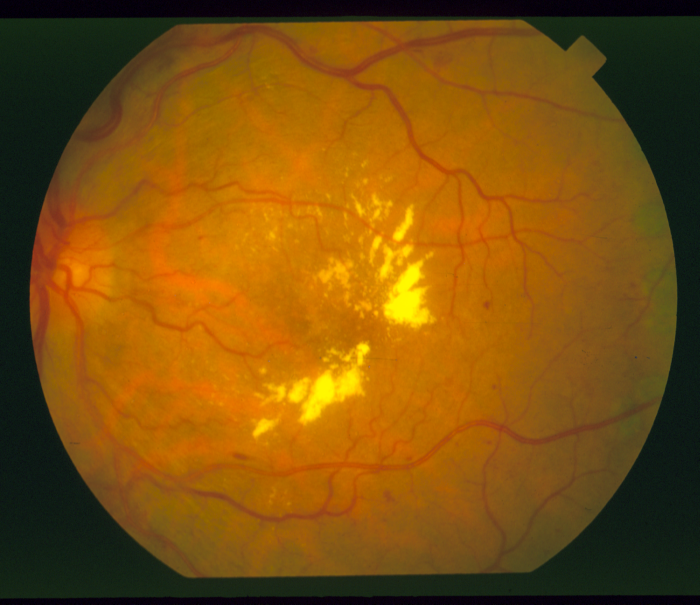

In [51]:
image = Image.open("images/im0001.ppm")
image

In [47]:
matrix = np.array(image)
w = image.width
h = image.height

In [48]:
def compare(l1, l2):
    return l1[0] <= l2[0] and l1[1] <= l2[1] and l1[2] <= l2[2]
m = np.array(image)
n = 1
for i in range(h):
    for j in range(w):
        first = True
        for p in range(i - n, i + n):
            for q in range(j - n, j + n):
                if(p >= 0 and p < h and q >= 0 and q < w):
                    if first:
                        first = False
                        min_v = matrix[p][q]
                    elif compare(matrix[p][q], min_v):
                        min_v = matrix[p][q]
        m[i][j] = min_v
#Image.fromarray(m)

In [49]:
c = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
#c = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
m = np.array(image)
n = 1
for i in range(h):
    for j in range(w):
        s = [0, 0, 0]
        for p in range(i - n, i + n):
            for q in range(j - n, j + n):
                if(p >= 0 and p < h and q >= 0 and q < w):
                    for k in range(0, 3):
                        s[k] += c[p - (i - n)][q - (j - n)] * matrix[p][q][k]
        for k in range(0, 3):
            m[i][j][k] = s[k]
#Image.fromarray(m)

In [50]:
filtered_image = image.filter(ImageFilter.GaussianBlur(radius = 5))
#filtered_image

4


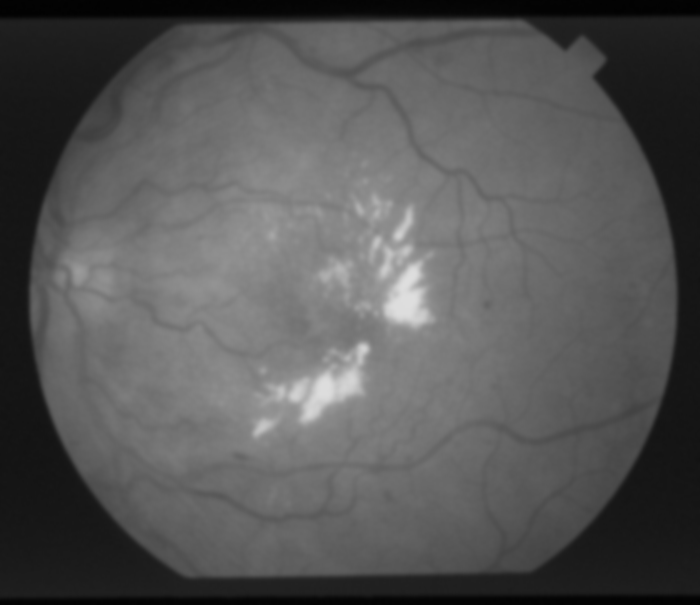

In [60]:
grayImage = ImageOps.grayscale(image)
grayImage = grayImage.filter(ImageFilter.GaussianBlur(radius = 2))
matrix = np.array(grayImage)
w = image.width
h = image.height
print(matrix[0][0])
grayImage

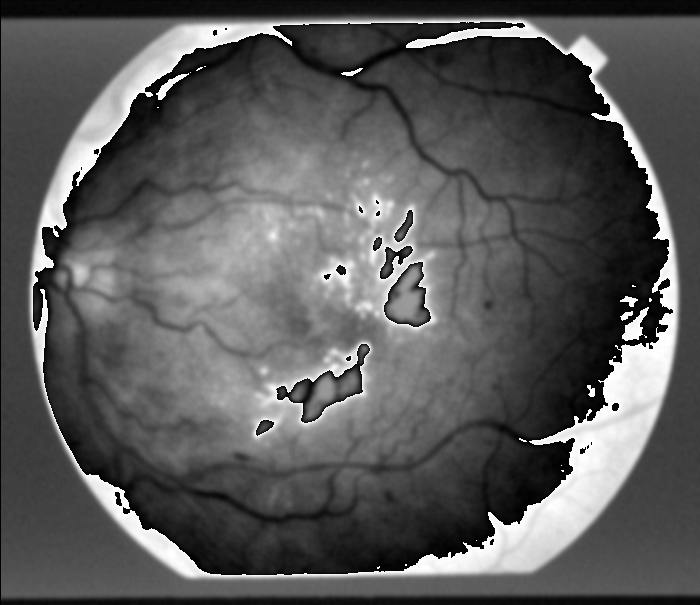

In [67]:
c = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
Gx = np.array(grayImage)
n = 1
for i in range(h):
    for j in range(w):
        s = 0
        for p in range(i - n, i + n):
            for q in range(j - n, j + n):
                if(p >= 0 and p < h and q >= 0 and q < w):
                    s += c[p - (i - n)][q - (j - n)] * matrix[p][q]
        Gx[i][j] = s
Image.fromarray(Gx)

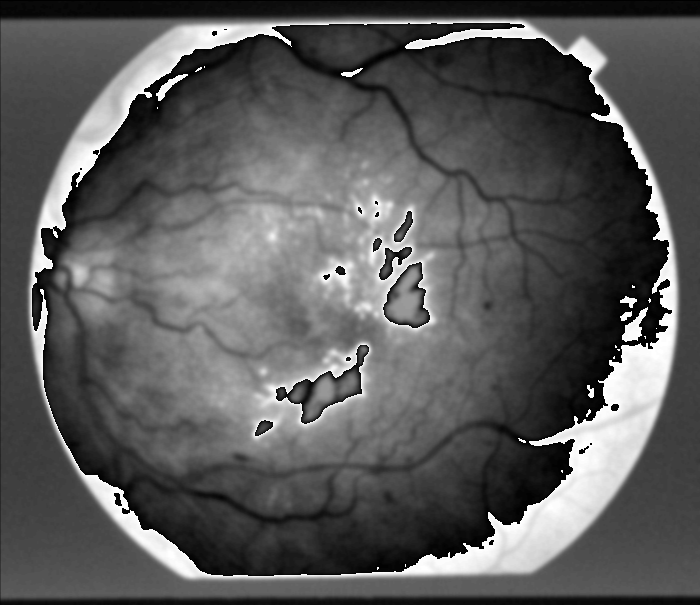

In [62]:
c = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
Gy = np.array(grayImage)
n = 1
for i in range(h):
    for j in range(w):
        s = 0
        for p in range(i - n, i + n):
            for q in range(j - n, j + n):
                if(p >= 0 and p < h and q >= 0 and q < w):
                    s += c[p - (i - n)][q - (j - n)] * matrix[p][q]
        Gy[i][j] = s
Image.fromarray(Gy)

In [76]:
import math
G = np.array(grayImage)
O = np.array(grayImage)
for i in range(h):
    for j in range(w):
        G[i][j] = math.sqrt(Gx[i][j] ** 2 + Gy[i][j] ** 2)
        O[i][j] = np.arctan2( Gy[i][j], Gx[i][j]) * (180 / math.pi)

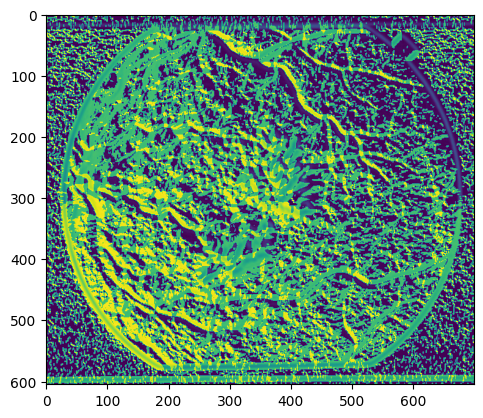

In [89]:
from scipy import ndimage
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.convolve(img, Kx)
    Iy = ndimage.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)
test1, test2 = sobel_filters(grayImage)
import matplotlib.pyplot as plt
plt.imshow(test1)
plt.show()

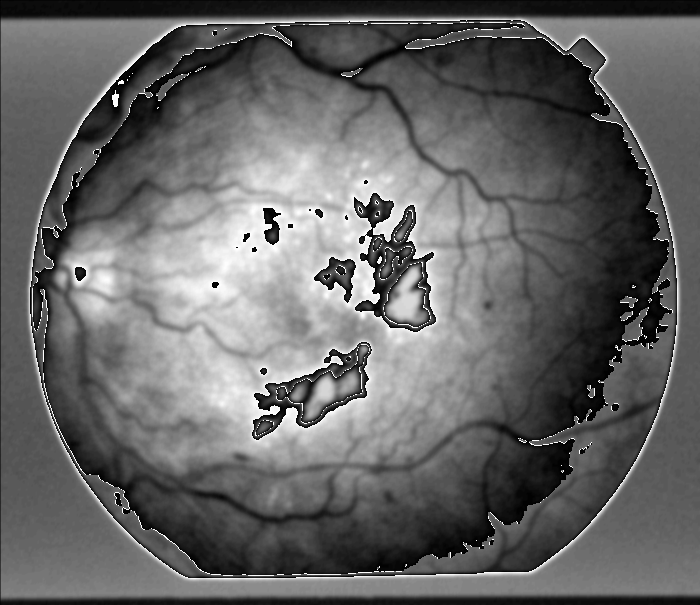

In [64]:
Image.fromarray(G)

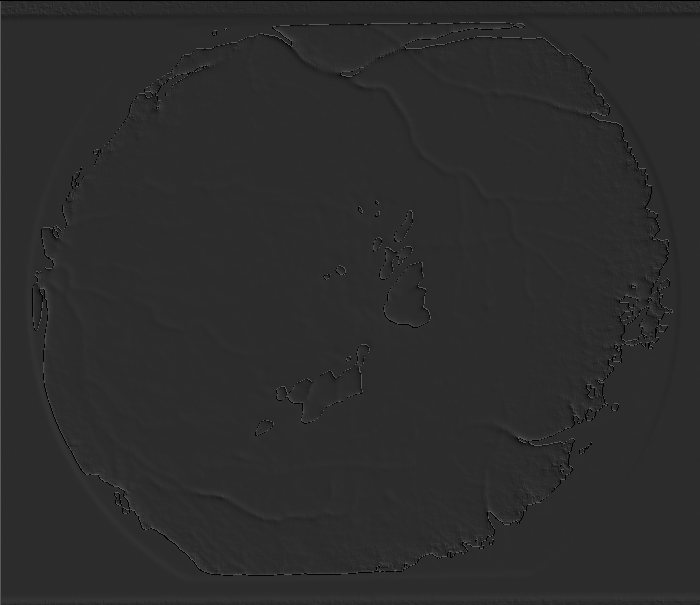

In [65]:
Image.fromarray(O)